In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [7]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_qualified = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] !='Clean Alternative Fuel Vehicle Eligible']

In [8]:
not_qualified

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10
11,7SAYGDEF4N,Yakima,Yakima,WA,98908.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,187486883,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
14,1FADP5FU4H,Thurston,Lacey,WA,98513.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22.0,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130437,WBA13AG06M,Thurston,Olympia,WA,98501.0,2021,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,22.0,196559310,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [25]:
#  Get all TESLA cars with the model year, and model type made in Bothell City.
tesla = df[(df['Make']=='TESLA') & (df['City'] =='Bothell')]

In [26]:
tesla[['City','Make','Model','Electric Vehicle Type']]

,City,Make,Model,Electric Vehicle Type
39,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
217,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
218,Bothell,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
222,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
292,Bothell,TESLA,MODEL X,Battery Electric Vehicle (BEV)
...,...,...,...,...
129778,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
129954,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
129976,Bothell,TESLA,MODEL S,Battery Electric Vehicle (BEV)
130295,Bothell,TESLA,MODEL 3,Battery Electric Vehicle (BEV)


In [30]:
# Get all the cars that have an electric range of more than 100, and were made after 2015
filtered_df = df[(df['Electric Range']>=100)&(df['Model Year']==2015)]

In [35]:
filtered_df[['County','Make','Electric Range','Model Year']]

,County,Make,Electric Range,Model Year
52,Snohomish,TESLA,208,2015
178,King,TESLA,208,2015
585,King,TESLA,208,2015
746,King,TESLA,208,2015
833,Kitsap,TESLA,208,2015
...,...,...,...,...
129732,Clark,TESLA,208,2015
129768,King,TESLA,208,2015
130215,Pierce,TESLA,208,2015
130332,Snohomish,TESLA,208,2015


In [38]:
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: count, dtype: int64

<Figure size 5000x2000 with 0 Axes>

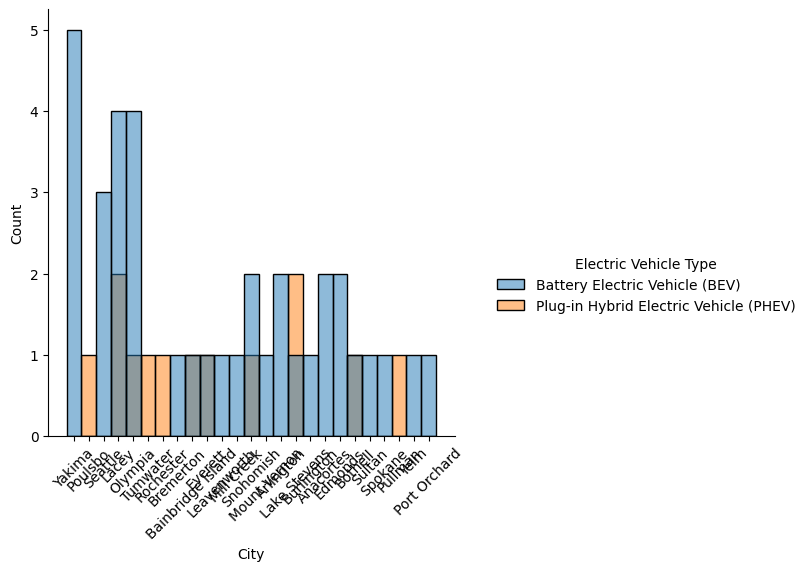

In [55]:
# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(50,20))
sns.displot(x=df['City'][:50],hue=df['Electric Vehicle Type'])
plt.xticks(rotation=45)
plt.show();
